# <a id="#">Task 3 – Mean, median, and Gaussian filtering</a>

In [1]:
import numpy 
import matplotlib.pyplot as plt

---

## Linear filtering by convolution (mean filter)

**<a id="#">Task 3.1.1.</a>** Load the image `data/astronaut.png` and show it:

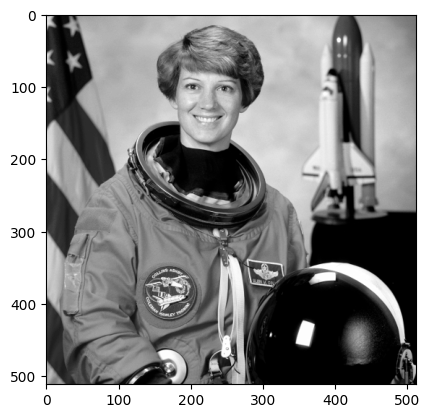

In [2]:
img = plt.imread("data/astronaut.png")
plt.figure()
plt.imshow(img, "gray")

**<a id="#">Task 3.1.2.</a>** Implement a mean filter:

In [3]:
def meanfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if (p[0] >= n and p[0] < img_in.shape[0] - n and p[1] >= n and p[1] < img_in.shape[1] - n):
            neighborhood_sum = 0
            for q in numpy.ndindex(size, size):
                neighborhood_sum += img_in[p[0]+q[0]-n, p[1]+q[1]-n]
            result[p] = neighborhood_sum / (size ** 2) 
        
    return result

**<a id="#">Task 3.1.3.</a>** Test your implementation from above by using the function `meanfilter` for the previously loaded image and show the result:

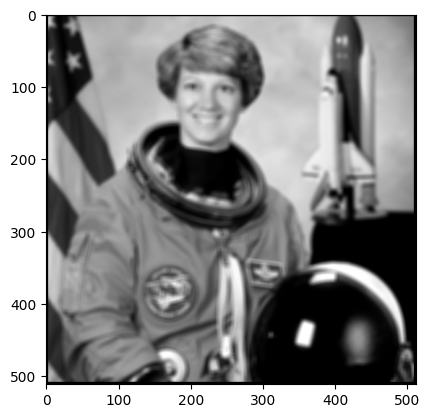

In [34]:
img_mean_filtered = meanfilter(img, 7)
plt.figure()
plt.imshow(img_mean_filtered, "gray")

**<a id="#">Task 3.1.4.</a>** Compare your result for filter size `5` with the correct result image `data/astronaut_meanfilter5.png`:

In [7]:
mean_ref = plt.imread("data/astronaut_meanfilter5.png")
mean_test = meanfilter(img, 5)
#plt.figure()
#plt.imshow(mean_ref, "gray")
assert numpy.allclose(mean_ref, mean_test, atol=1/255)

---

## Non-linear filtering

**<a id="#">Task 3.2.1.</a>** Implement a median filter:

In [14]:
def medianfilter(img_in, size):
    result = numpy.zeros(img_in.shape)
    n = (size - 1) // 2
    for p in numpy.ndindex(img_in.shape):
        if (p[0] >= n and p[0] < img_in.shape[0] - n and p[1] >= n and p[1] < img_in.shape[1] - n):
            neighborhood_values = []
            for q in numpy.ndindex(size, size):
                neighborhood_values.append(img_in[p[0]+q[0]-n, p[1]+q[1]-n])
            result[p] = sorted(neighborhood_values)[len(neighborhood_values)//2]

    return result

**<a id="#">Task 3.2.2.</a>** First, test your implementation from above by using the function `medianfilter` for the previously loaded image and show the result:

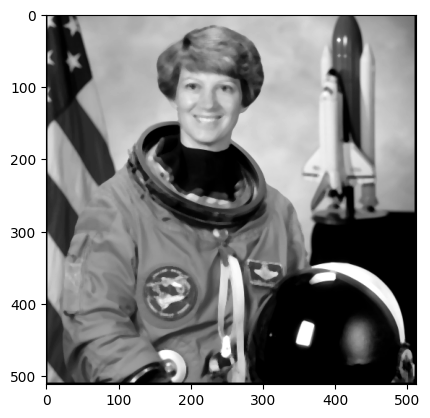

In [33]:
img_median_filtered = medianfilter(img, 5)
plt.figure()
plt.imshow(img_median_filtered, "gray")

Then, compare your result for filter size `5` with the correct result image `data/astronaut_medianfilter5.png`:

In [17]:
median_ref = plt.imread("data/astronaut_medianfilter5.png")
median_test = medianfilter(img, 5)
assert numpy.allclose(median_ref, median_test, atol=1/255)

---

## Using pre-implemented filters

**<a id="#">Task 3.3.1.</a>** Load the package `scipy.ndimage`:

In [18]:
import scipy.ndimage

**<a id="#">Task 3.3.2 (a).</a>** Apply a **mean filter** from `scipy.ndimage` to the loaded image:

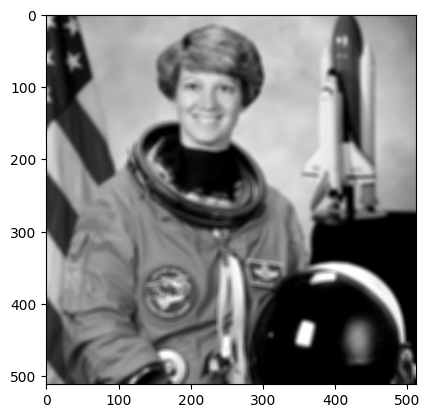

In [35]:
scipy_mean = scipy.ndimage.uniform_filter(img, 7)
plt.figure()
plt.imshow(scipy_mean, "gray")

**<a id="#">Task 3.3.2 (b).</a>** Apply a **median filter** from `scipy.ndimage` to the loaded image:

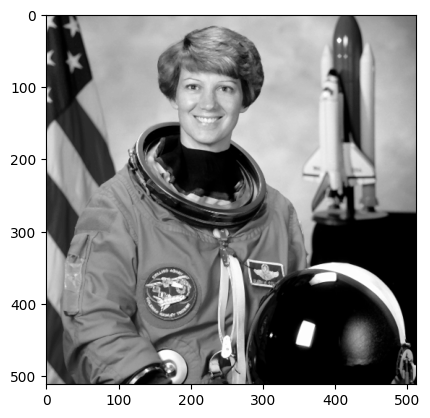

In [28]:
scipy_median = scipy.ndimage.median_filter(img, 2)
plt.figure()
plt.imshow(scipy_median, "gray")

**<a id="#">Task 3.3.2 (c).</a>** Apply a **Gaussian filter** from `scipy.ndimage` to the loaded image:

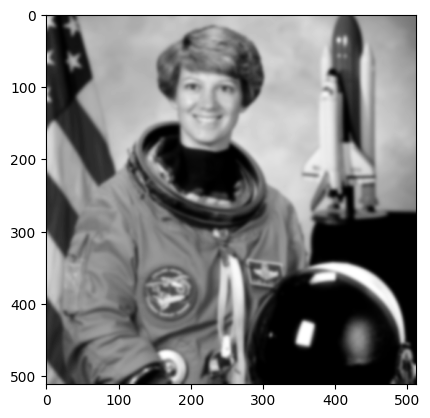

In [25]:
scipy_gaussian = scipy.ndimage.gaussian_filter(img, 2)
plt.figure()
plt.imshow(scipy_gaussian, "gray")

**<a id="#">Task 3.3.3.</a>** Compare the results obtained using the functions from `scipy.ndimage` with those you obtained using your own implementations. What are the main differences? Do you have an explanation?

The filtered images obtained using the built-in filters do not have black edges. Maybe they start by a copy of the image to be filtered rather than an array of zeros?

---

## Slicing and benchmarking

**<a id="#">Task 3.4.2.</a>** Implement either a mean filter or a median filter using only a single `for`-loop:

In [ ]:
def fastfilter(img_in, size):
    ...

**<a id="#">Task 3.4.3.</a>** First, test your implementation from above by using the function `fastfilter` for the previously loaded image and show the result:

Then, compare your result to those obtained using your implementation for either `meanfilter` or `medianfilter`, respectively:

**<a id="#">Task 3.4.4.</a>** Benchmark the code run times:

**<a id="#">Task 3.4.5.</a>** Document your observations regarding the benchmarking results and try to think of an explanation: